In [1]:
import nltk
import numpy as np
from nltk import word_tokenize

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Using a Tagger

In [3]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [4]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

# Tagged Corpora

#### Representing Tagged Tokens

In [5]:
tagged_token = nltk.tag.str2tuple("fly/NN")
tagged_token
tagged_token[0]
tagged_token[1]

('fly', 'NN')

'fly'

'NN'

In [6]:
sent = """
 The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN 
 other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
 Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
 said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
 accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
 interest/NN of/IN both/ABX governments/NNS ''/'' ./.
"""
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


#### Reading Tagged Corpora

In [7]:
nltk.corpus.brown.tagged_words()
nltk.corpus.brown.tagged_words(tagset="universal")

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [8]:
print(nltk.corpus.nps_chat.tagged_words())
nltk.corpus.conll2000.tagged_words()
nltk.corpus.treebank.tagged_words()

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [9]:
nltk.corpus.brown.tagged_words(tagset="universal")
nltk.corpus.treebank.tagged_words(tagset="universal")

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [10]:
nltk.corpus.sinica_treebank.tagged_words()
nltk.corpus.indian.tagged_words()
nltk.corpus.mac_morpho.tagged_words()
nltk.corpus.cess_cat.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

#### A Universal Part-of-Speech Tagset

In [11]:
from nltk.corpus import brown

brown_news_tagged = brown.tagged_words(categories="news", tagset="universal")
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

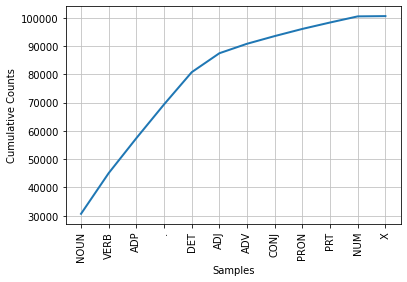

In [12]:
tag_fd.plot(cumulative=True)

#### Nouns

In [13]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == "NOUN"]
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

#### Verbs

In [14]:
wsj = nltk.corpus.treebank.tagged_words(tagset="universal")
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == "VERB"])

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get', 'might', 'sell', 'added', 'sold', 'help', 'including', 'should', 'reported', 'according', 'pay', 'compared', 'being', 'fell', 'began', 'based', 'used', 'closed', "'re", 'want', 'see', 'took', 'yield', 'offered', 'set', 'priced', 'approved', 'come', 'noted', 'cut', 'ended', 'found', 'increased', 'become', 'think', 'named', 'go', 'trying', 'proposed', 'received', 'growing', 'declined', 'held', 'give', 'came', 'use', 'put', 'making', 'continue', 'raise', 'estimated', 'called', 'paid', 'designed', 'going', 'expects', 'seeking', 'must', 'plans', 'wo', 'increasing', 'saying', 'got', 'owns', 'trading', 'acquired', 'gained', 'fined', 'reached', 'holding', 'announced', 'filed', 'became', 'seek', 'included', 'using', 'led', 'decided', 'keep', 'disclosed', 'agreed', 'find', 'failed', 'ru

In [15]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1["yield"].most_common()
cfd1["cut"].most_common()

[('VERB', 28), ('NOUN', 20)]

[('VERB', 25), ('NOUN', 3)]

In [16]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2["VBN"]))

['been', 'expected', 'made', 'compared', 'based', 'used', 'priced', 'sold', 'named', 'designed', 'held', 'fined', 'taken', 'paid', 'traded', 'increased', 'said', 'filed', 'reached', 'called', 'scheduled', 'disclosed', 'reported', 'proposed', 'estimated', 'set', 'known', 'built', 'approved', 'given', 'acquired', 'found', 'offered', 'received', 'caused', 'considered', 'ordered', 'required', 'preferred', 'led', 'issued', 'fixed', 'listed', 'prepared', 'involved', 'aimed', 'needed', 'launched', 'produced', 'put', 'planned', 'seen', 'alleged', 'valued', 'barred', 'become', 'related', 'improved', 'changed', 'provided', 'come', 'got', 'allowed', 'mixed', 'suspended', 'owned', 'elected', 'worried', 'completed', 'combined', 'raised', 'left', 'placed', 'invested', 'fallen', 'failed', 'helped', 'run', 'opposed', 'quoted', 'continued', 'threatened', 'offset', 'shipped', 'eliminated', 'followed', 'sought', 'hurt', 'replaced', 'covered', 'boosted', 'registered', 'focused', 'closed', 'adjusted', 'wri

In [17]:
print([w for w in cfd1.conditions() if "VBD" in cfd1[w] and "VBN" in cfd1[w]])
idx1 = wsj.index(("kicked", "VBD"))
wsj[idx1 - 4 : idx1 + 1]

idx2 = wsj.index(("kicked", "VBN"))
wsj[idx2 - 4 : idx2 + 1]

[]


[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

#### Adjectives and Adverbs

#### Unsimplified Text

In [18]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist(
        (tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix)
    )
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())


tagdict = findtags("NN", nltk.corpus.brown.tagged_words(categories="news"))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

#### Exploring Tagged Corpora

In [19]:
brown_learned_text = brown.words(categories="learned")
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == "often")))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [20]:
brown_lrnd_tagged = brown.tagged_words(categories="learned", tagset="universal")
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == "often"]
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [21]:
from nltk.corpus import brown


def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if t1.startswith("V") and t2 == "TO" and t3.startswith("V"):
            print(w1, w2, w3)


for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

In [22]:
brown_news_tagged = brown.tagged_words(categories="news", tagset="universal")
data = nltk.ConditionalFreqDist(
    (word.lower(), tag) for (word, tag) in brown_news_tagged
)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, " ".join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


# Mapping Words to Properties Using Python Dictionaries

#### Indexing Lists vs Dictionaries

#### Dictionaries in Python

In [23]:
pos = {}
pos
pos["colorless"] = "ADJ"
pos
pos["ideas"] = "N"
pos["sleep"] = "V"
pos["furiously"] = "ADV"
pos

{}

{'colorless': 'ADJ'}

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [24]:
pos["ideas"]
pos["colorless"]
pos["green"]

'N'

'ADJ'

KeyError: 'green'

In [25]:
list(pos)
sorted(pos)
[w for w in pos if w.endswith("s")]

['colorless', 'ideas', 'sleep', 'furiously']

['colorless', 'furiously', 'ideas', 'sleep']

['colorless', 'ideas']

In [26]:
for word in sorted(pos):
    print(word + ":", pos[word])

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


In [27]:
list(pos.keys())
list(pos.values())
list(pos.items())
for key, val in sorted(pos.items()):
    print(key + ":", val)

['colorless', 'ideas', 'sleep', 'furiously']

['ADJ', 'N', 'V', 'ADV']

[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


#### Defining Dictionaries

In [28]:
pos = {"colorless": "ADJ", "ideas": "N", "sleep": "V", "furiously": "ADV"}
pos = dict(colorless="ADJ", ideas="N", sleep="V", furiously="ADV")
pos = {["ideas", "blogs", "adventures"]: "N"}

TypeError: unhashable type: 'list'

#### Default Dictionaries

In [29]:
from collections import defaultdict

frequency = defaultdict(int)
frequency["colorless"] = 4
frequency["ideas"]
pos = defaultdict(list)
pos["sleep"] = ["NOUN", "VERB"]
pos["ideas"]

0

[]

In [30]:
pos = defaultdict(lambda: "NOUN")
pos["colorless"] = "ADJ"
pos["blog"]
list(pos.items())

'NOUN'

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [31]:
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: "UNK")
for v in v1000:
    mapping[v] = v

alice2 = [mapping[v] for v in alice]
print(alice2[:100])
len(set(alice2))

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


1001

#### Incrementally Updating a Dictionary

In [32]:
from collections import defaultdict

from nltk.corpus import brown

counts = defaultdict(int)

for (word, tag) in brown.tagged_words(categories="news", tagset="universal"):
    counts[tag] += 1

sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [33]:
from operator import itemgetter

sorted(counts.items(), key=itemgetter(1), reverse=True)
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

In [34]:
pair = ("NP", 8336)
pair[1]
itemgetter(1)(pair)

8336

8336

In [35]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words("en")
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

last_letters["ly"]
last_letters["zy"]

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy',
 'fizzy',
 'floozy',
 'fozy',
 'franzy',
 'frenzy',
 'friezy',
 'frizzy',
 'frowzy',
 'furzy',
 'fuzzy',
 'gauzy',
 'gazy',
 'glazy',
 'groszy',
 'hazy',
 'heezy',
 'Izzy',
 'jazzy',
 'Jozy',
 'lawzy',
 'lazy',
 'mazy',
 'mizzy',
 'muzzy',
 'nizy',
 'oozy',
 'quartzy',
 'quizzy',
 'refrenzy',
 'ritzy',
 'Shortzy',
 'sizy',
 'sleazy',
 'sneezy',
 'snoozy',
 'squeezy',
 'Suzy',
 'tanzy',
 'tizzy',
 'topazy',
 'trotcozy',
 'twazzy',
 'unbreezy',
 'unfrizzy',
 'wheezy',
 'woozy',
 'wuzzy',
 'yezzy']

In [36]:
anagrams = defaultdict(list)
for word in words:
    key = "".join(sorted(word))
    anagrams[key].append(word)

anagrams["aeilnrt"]

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [37]:
anagrams = nltk.Index(("".join(sorted(w)), w) for w in words)
anagrams["aeilnrt"]

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

#### Complex Keys and Values

In [38]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories="news", tagset="universal")
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

pos[("DET", "right")]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

#### Inverting a Dictionary

In [39]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words("milton-paradise.txt"):
    counts[word] += 1

[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [40]:
pos = {"colorless": "ADJ", "ideas": "N", "sleep": "V", "furiously": "ADV"}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2["N"]

'ideas'

In [41]:
pos.update({"cats": "N", "scratch": "V", "peacefully": "ADV", "old": "ADJ"})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)

pos2["ADV"]

['furiously', 'peacefully']

In [42]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2["ADV"]

['furiously', 'peacefully']

# Automatic Tagging

In [43]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories="news")
brown_sents = brown.sents(categories="news")

#### The Default Tagger

In [44]:
tags = [tag for (word, tag) in brown.tagged_words(categories="news")]
nltk.FreqDist(tags).max()

'NN'

In [45]:
raw = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger("NN")
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [46]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

#### The Regular Expression Tagger

In [47]:
patterns = [
    (r".*ing$", "VBG"),  # gerunds
    (r".*ed$", "VBD"),  # simple past
    (r".*es$", "VBZ"),  # 3rd singular present
    (r".*ould$", "MD"),  # modals
    (r".*\'s$", "NN$"),  # possessive nouns
    (r".*s$", "NNS"),  # plural nouns
    (r"^-?[0-9]+(\.[0-9]+)?$", "CD"),  # cardinal numbers
    (r".*", "NN"),  # nouns (default)
]

In [48]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])
regexp_tagger.evaluate(brown_tagged_sents)

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

0.20186168625812995

#### The Lookup Tagger

In [49]:
fd = nltk.FreqDist(brown.words(categories="news"))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories="news"))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [50]:
sent = brown.sents(categories="news")[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [51]:
baseline_tagger = nltk.UnigramTagger(
    model=likely_tags, backoff=nltk.DefaultTagger("NN")
)

In [52]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger("NN"))
    return baseline_tagger.evaluate(brown.tagged_sents(categories="news"))


def display():
    import matplotlib.pyplot as pylab

    word_freqs = nltk.FreqDist(brown.words(categories="news")).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories="news"))
    sizes = 2 ** np.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, "-bo")
    pylab.title("Lookup Tagger Performance with Varying Model Size")
    pylab.xlabel("Model Size")
    pylab.ylabel("Performance")
    pylab.show()

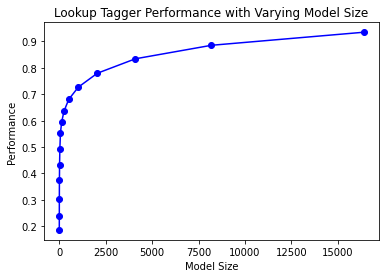

In [53]:
display()

#### Evaluation

# N-Gram Tagging

#### Unigram Tagging

In [54]:
from nltk.corpus import brown

brown_tagged_sents = brown.tagged_sents(categories="news")
brown_sents = brown.sents(categories="news")
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
unigram_tagger.evaluate(brown_tagged_sents)

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

0.9349006503968017

#### Separating the Training and Testing Data

In [55]:
size = int(len(brown_tagged_sents) * 0.9)
size

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

4160

0.8121200039868434

#### General N-Gram Tagging

In [56]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [57]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

#### Combining Taggers

In [58]:
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

#### Combining Unknown Words

#### Storing Taggers

In [59]:
from pickle import dump

output = open("t2.pkl", "wb")
dump(t2, output, -1)
output.close()

In [60]:
from pickle import load

inputf = open("t2.pkl", "rb")
tagger = load(inputf)
inputf.close()

In [61]:
text = """The board's action shows what free enterprise
     is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

#### Performance Limitations

In [62]:
cfd = nltk.ConditionalFreqDist(
    ((x[1], y[1], z[0]), z[1])
    for sent in brown_tagged_sents
    for x, y, z in nltk.trigrams(sent)
)
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [63]:
test_tags = [
    tag for sent in brown.sents(categories="editorial") for (word, tag) in t2.tag(sent)
]

gold_tags = [tag for (word, tag) in brown.tagged_words(categories="editorial")]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Transformation Based Tagging

# How to Determine the Category of a Word